# 1. Exploratory Data Analysis (EDA) - Plank Exercise

**Objective:** Load the plank dataset, understand its structure, identify missing values, analyze feature distributions, and visualize key aspects before feature engineering.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

## 1.1 Load Data

In [9]:
BASE_DATA_PATH = "../data/"
TRAIN_DATA_PATH = os.path.join(BASE_DATA_PATH, "train.csv")
TEST_DATA_PATH = os.path.join(BASE_DATA_PATH, "test.csv")

try:
    df_train_raw = pd.read_csv(TRAIN_DATA_PATH)
    df_test_raw = pd.read_csv(TEST_DATA_PATH)
    print("Train and Test datasets loaded successfully.")
    print(f"Training data shape: {df_train_raw.shape}")
    print(f"Test data shape: {df_test_raw.shape}")
except FileNotFoundError as e:
    print(f"Error: {e}. Make sure train.csv and test.csv are in the '{BASE_DATA_PATH}' directory.")
    df_train_raw = pd.DataFrame()
    df_test_raw = pd.DataFrame()

Train and Test datasets loaded successfully.
Training data shape: (28520, 69)
Test data shape: (710, 69)


## 1.2 Initial Data Inspection

In [10]:
if not df_train_raw.empty:
    print("--- Training Data ---_raw")
    print("\nFirst 5 rows:")
    display(df_train_raw.head())
    print("\nInfo:")
    df_train_raw.info(verbose=False) # Use verbose=False for conciseness with many columns
    print("\nDescriptive Statistics (Label and first 5 landmark columns):")
    display(df_train_raw.iloc[:, :6].describe().T)
else:
    print("Training data is empty or not loaded.")

--- Training Data ---_raw

First 5 rows:


,label,nose_x,nose_y,nose_z,nose_v,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_shoulder_v,right_shoulder_x,...,right_heel_z,right_heel_v,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_v,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_v
0,C,0.792141,0.585212,-0.067640,0.999518,0.682632,0.539670,0.270455,0.996880,0.688922,...,-0.077094,0.957863,0.098083,0.716431,0.186286,0.685353,0.084355,0.724885,-0.230562,0.952622
1,C,0.792153,0.585208,-0.067657,0.999518,0.682624,0.539675,0.270204,0.996868,0.688926,...,-0.075767,0.958398,0.098175,0.716389,0.188317,0.685743,0.084443,0.724854,-0.228939,0.952915
2,C,0.792160,0.585211,-0.067602,0.999519,0.682617,0.539684,0.270091,0.996864,0.688927,...,-0.075364,0.958592,0.098203,0.716382,0.188618,0.686022,0.084499,0.724839,-0.228520,0.952998
3,C,0.792171,0.585225,-0.067480,0.999520,0.682611,0.539690,0.270020,0.996866,0.688929,...,-0.074546,0.958883,0.098239,0.716374,0.190058,0.686536,0.084533,0.724826,-0.227477,0.953112
4,C,0.792179,0.585240,-0.067460,0.999522,0.682607,0.539697,0.269914,0.996867,0.688932,...,-0.074029,0.959184,0.098282,0.716365,0.191131,0.686611,0.084556,0.724814,-0.226812,0.953242



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28520 entries, 0 to 28519
Columns: 69 entries, label to right_foot_index_v
dtypes: float64(68), object(1)
memory usage: 15.0+ MB

Descriptive Statistics (Label and first 5 landmark columns):


,count,mean,std,min,25%,50%,75%,max
nose_x,28520.0,0.510215,0.271763,-0.020205,0.217230,0.522769,0.792730,0.926463
nose_y,28520.0,0.581268,0.110770,0.282129,0.513137,0.578837,0.655644,0.821666
nose_z,28520.0,-0.015778,0.069960,-0.628718,-0.030574,-0.009271,0.013992,0.229125
nose_v,28520.0,0.999339,0.001282,0.983588,0.999396,0.999817,0.999919,0.999995
left_shoulder_x,28520.0,0.497311,0.212051,0.072622,0.272365,0.506357,0.712670,0.812100


## 1.3 Missing Value Analysis

In [11]:
if not df_train_raw.empty:
    missing_train = df_train_raw.isnull().sum()
    missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
    if not missing_train.empty:
        print(f"Found {len(missing_train)} columns with missing values in the training data.")
        plt.figure(figsize=(12, 8))
        sns.barplot(x=missing_train.values, y=missing_train.index[:30]) # Plot top 30
        plt.title('Top 30 Columns with Missing Values (Training Data)')
        plt.xlabel('Number of Missing Values')
        plt.tight_layout()
        plt.show()
    else:
        print("No missing values found in training data.")

No missing values found in training data.


**Observation:** Missing values in landmark coordinates (`_x`, `_y`, `_z`) or visibility (`_v`) are expected. They occur when MediaPipe fails to detect a specific landmark in a frame. Our feature extraction logic will need to be robust to this.

## 1.4 Label Distribution

--- Training Label Distribution ---
label
C    9904
L    9546
H    9070
Name: count, dtype: int64

--- Test Label Distribution ---
label
H    241
L    235
C    234
Name: count, dtype: int64


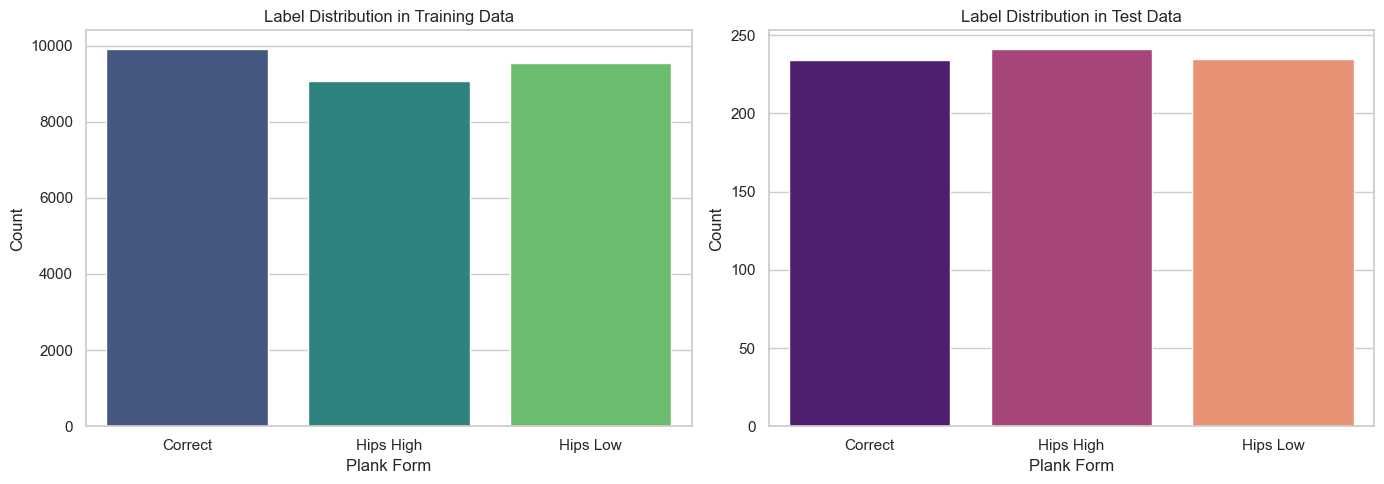

In [12]:
if not df_train_raw.empty and 'label' in df_train_raw.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    label_map = {"C": "Correct", "H": "Hips High", "L": "Hips Low"}
    
    # Training Data
    sns.countplot(ax=axes[0], x=df_train_raw['label'].map(label_map), order=label_map.values(), palette="viridis")
    axes[0].set_title('Label Distribution in Training Data')
    axes[0].set_xlabel('Plank Form')
    axes[0].set_ylabel('Count')
    print("--- Training Label Distribution ---")
    print(df_train_raw['label'].value_counts())
    
    # Test Data
    if not df_test_raw.empty and 'label' in df_test_raw.columns:
        sns.countplot(ax=axes[1], x=df_test_raw['label'].map(label_map), order=label_map.values(), palette="magma")
        axes[1].set_title('Label Distribution in Test Data')
        axes[1].set_xlabel('Plank Form')
        axes[1].set_ylabel('Count')
        print("\n--- Test Label Distribution ---")
        print(df_test_raw['label'].value_counts())
    
    plt.tight_layout()
    plt.show()
else:
    print("Label column not found or data empty.")

**Observation:** We can see the number of samples for each class. It's important to check for significant class imbalance, which could bias the model. Using `class_weight='balanced'` during training is a good strategy to mitigate this.

## 1.5 Visibility Score Distribution

Analyzing 17 visibility columns.


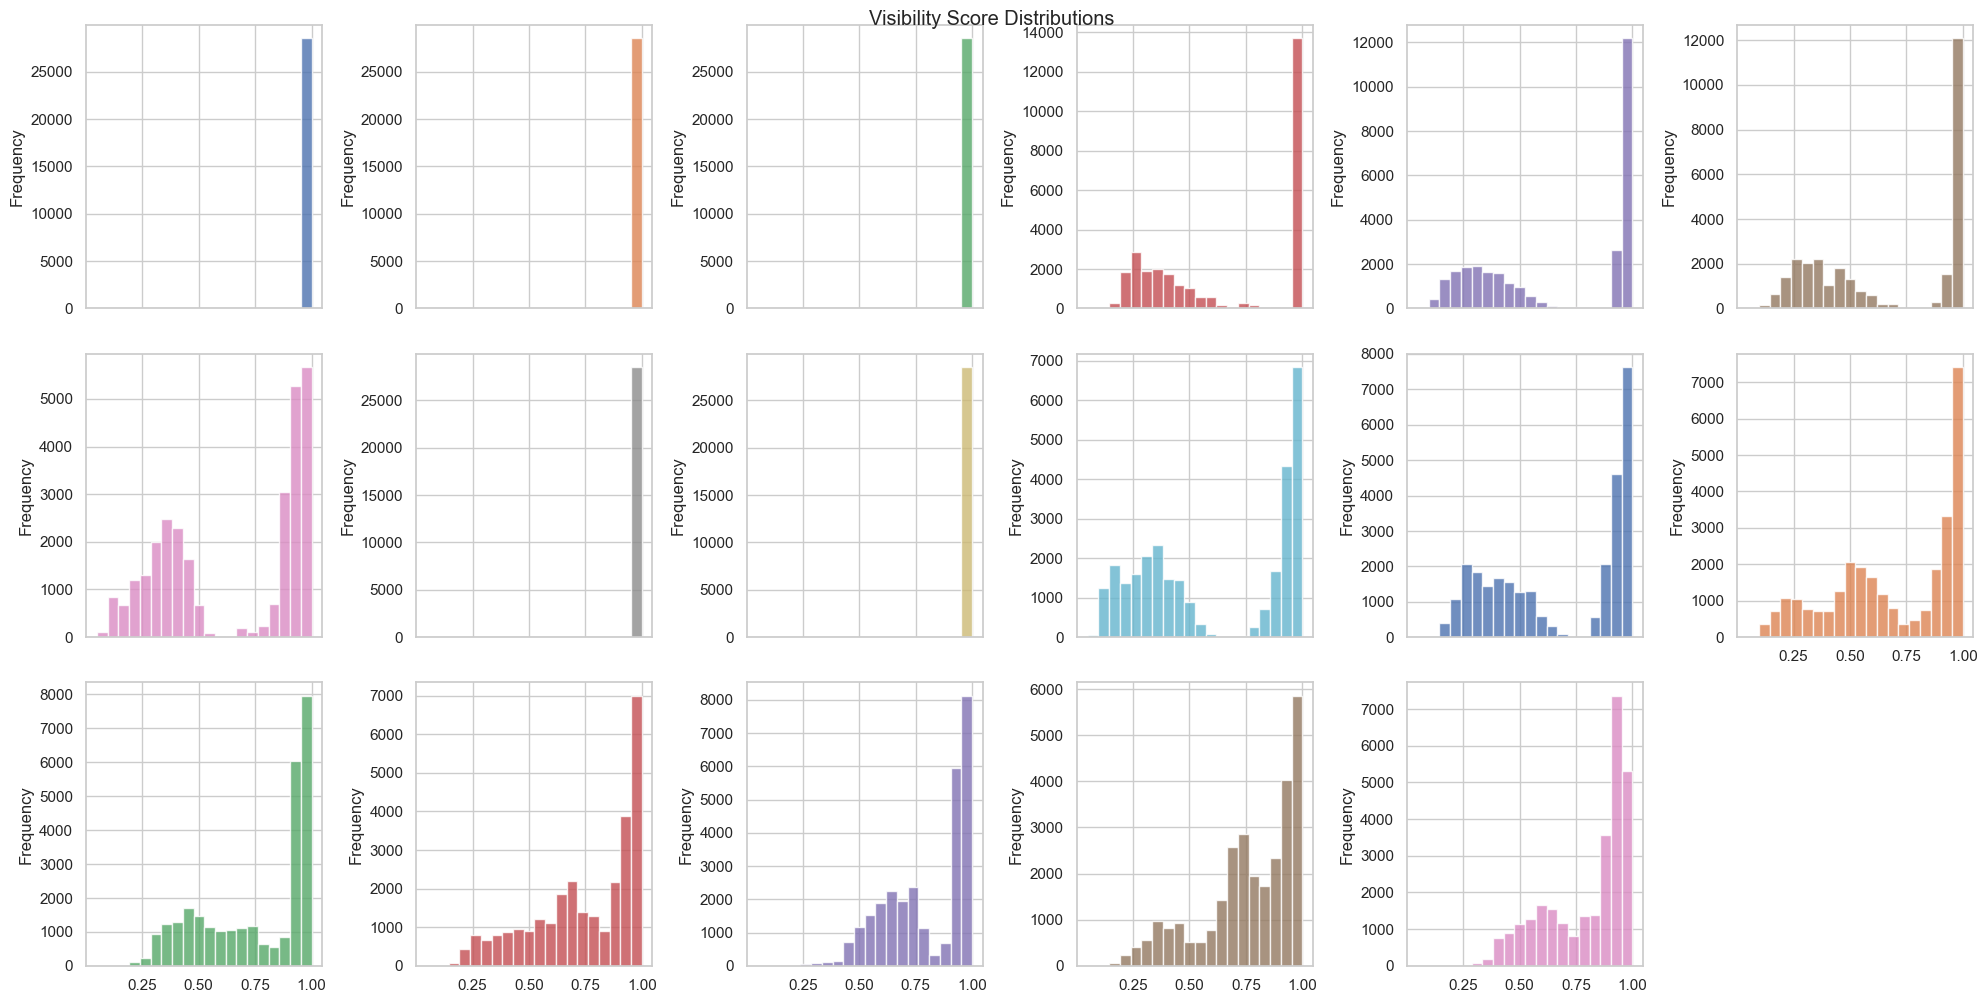

In [13]:
if not df_train_raw.empty:
    visibility_cols = [col for col in df_train_raw.columns if col.endswith('_v')]
    if visibility_cols:
        print(f"Analyzing {len(visibility_cols)} visibility columns.")
        df_train_raw[visibility_cols].plot(kind='hist', subplots=True, layout=(6, 6), figsize=(20, 20), 
                                            bins=20, alpha=0.8, title="Visibility Score Distributions", legend=False)
        plt.tight_layout()
        plt.show()
    else:
        print("No visibility columns found.")

**Observation:** Visibility scores range from 0 to 1. A score close to 1 indicates the landmark is clearly visible and tracked with high confidence. Low scores suggest occlusion or detection difficulty. We will use a visibility threshold during feature engineering to ensure we only use reliable landmarks for calculating angles and distances.

## 1.6 EDA Summary & Next Steps

This initial exploration has provided key insights:
1.  **Data Structure:** The dataset consists of 33 landmarks, each with x, y, z, and visibility coordinates.
2.  **Missing Data:** Missing values are present and expected; our processing pipeline must handle them.
3.  **Labels:** We have three classes (`C`, `H`, `L`) for plank form. The distribution seems reasonably balanced, but using class weights is still advisable.
4.  **Visibility:** The visibility scores vary across landmarks, confirming the need for a filtering threshold.

**Next Steps (in `2_data_preprocessing_and_model_training.ipynb`):**
1.  **Feature Engineering:** Extract meaningful geometric features (angles, distances) from the raw landmark data, using `GeometryUtils` and a visibility threshold.
2.  **Model Training:** Create `scikit-learn` pipelines that include imputation, scaling, and the model itself.
3.  **Evaluation:** Train and evaluate multiple models (Logistic Regression, KNN, RandomForest, etc.) to find the best performer.
4.  **Model Saving:** Save the trained pipelines for future inference and deployment.